In [9]:
import pandas as pd
import numpy as np
from datetime import timedelta
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [10]:
def clean(features, data):
    choose = np.array([True] * len(data))
    for feature in features:
        z_score = stats.zscore(data[feature])
        z_score = np.abs(z_score) < 3
        choose = choose & z_score
    data_clean = data[choose]
    return data_clean


df = pd.read_csv('data.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by=['row', 'col'], ascending=[True, True]).reset_index(drop=True)

df['AWS2'] = df['AWS']

features = [
    'AWS2', 'CAPE', 'V850', 'EWSS', 'KX', 'U250', 'U850', 'CIN', 'V250', 'R250',
    'hour_sin','hour_cos','doy_sin','doy_cos'
]
target = 'AWS'

df = clean(features[0:10],df)

df['year'] = df['datetime'].dt.year
df['hour'] = df['datetime'].dt.hour
df['doy']  = df['datetime'].dt.dayofyear
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['doy_sin']  = np.sin(2 * np.pi * df['doy']  / 365)
df['doy_cos']  = np.cos(2 * np.pi * df['doy']  / 365)


In [11]:
split_time = pd.Timestamp('2020-10-15 23:00:00')
df_train = df[df['datetime'] <= split_time].reset_index(drop=True)
df_test  = df[df['datetime'] >  split_time].reset_index(drop=True)

scaler = StandardScaler()
df_train[features] = scaler.fit_transform(df_train[features])
df_test[features]  = scaler.transform(df_test[features])


In [12]:
def make_sequences(data, feats, tgt, window_size, horizon):
    X, y = [], []
    arr_f = data[feats].values
    arr_t = data[tgt].values
    times = data['datetime'].tolist()
    for i in range(window_size, len(data) - horizon + 1):
        if any((times[j] - times[j-1]).total_seconds() != 3600 
               for j in range(i-window_size+1, i+horizon)):
            continue
        X.append(arr_f[i-window_size:i])
        y.append(arr_t[i:i+horizon])
    return np.array(X), np.array(y)


window_size = 3
horizon     = 6

X_train, y_train = make_sequences(df_train, features, target, window_size, horizon)
X_test,  y_test  = make_sequences(df_test,  features, target, window_size, horizon)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test  shapes:", X_test.shape,  y_test.shape)


Train shapes: (325630, 3, 14) (325630, 6)
Test  shapes: (69842, 3, 14) (69842, 6)


Trial 20 Complete [00h 05m 41s]
val_r2_keras: -808700.8125

Best val_r2_keras So Far: -328084.15625
Total elapsed time: 02h 55m 32s
Best hyperparameters:
  units1   = 64
  units2   = 128
  dropout1 = 0.40
  dropout2 = 0.40
  lr       = 0.01
Epoch 1/200


c:\Users\giakh\miniconda3\envs\ai_train\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


4066/4071 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1407 - mae: 0.1062 - r2_keras: -0.0744
Epoch 1: val_r2_keras improved from -inf to -3984562.25000, saving model to best_lstm.h5


4071/4071 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step - loss: 0.1407 - mae: 0.1062 - r2_keras: -0.0744 - val_loss: 0.3148 - val_mae: 0.1580 - val_r2_keras: -3984562.2500 - learning_rate: 0.0100
Epoch 2/200
4066/4071 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1385 - mae: 0.1037 - r2_keras: -0.0535
Epoch 2: val_r2_keras did not improve from -3984562.25000
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 0.1385 - mae: 0.1037 - r2_keras: -0.0536 - val_loss: 0.2340 - val_mae: 0.1629 - val_r2_keras: -6901147.5000 - learning_rate: 0.0100
Epoch 3/200
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1367 - mae: 0.1047 - r2_keras: -0.0572
Epoch 3: val_r2_keras did not improve from -3984562.25000
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 0.1367 - mae: 0.1047 - r2_keras: -0.0572 - val_loss: 0.2523 - val_mae: 0.1518 - val_r2_keras: -4786137.5000 - learning_rate: 0.0100
Epoch 4/200
4069/4071 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1352 - mae: 0.1036 - r2_keras: -0.1084
Epoch 4: val_r2_k

4071/4071 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 0.1328 - mae: 0.1026 - r2_keras: -0.0782 - val_loss: 0.2561 - val_mae: 0.1535 - val_r2_keras: -2991464.0000 - learning_rate: 0.0100
Epoch 6/200
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1342 - mae: 0.1022 - r2_keras: -0.0731
Epoch 6: val_r2_keras did not improve from -2991464.00000
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 0.1342 - mae: 0.1022 - r2_keras: -0.0731 - val_loss: 0.2507 - val_mae: 0.1453 - val_r2_keras: -3812395.0000 - learning_rate: 0.0100
Epoch 7/200
4066/4071 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1369 - mae: 0.1038 - r2_keras: -0.0959
Epoch 7: val_r2_keras did not improve from -2991464.00000
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 0.1368 - mae: 0.1038 - r2_keras: -0.0959 - val_loss: 0.2593 - val_mae: 0.1656 - val_r2_keras: -6283189.5000 - learning_rate: 0.0100
Epoch 8/200
4066/4071 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1347 - mae: 0.1032 - r2_keras: -0.0899
Epoch 8: val_r2_k

4071/4071 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.1337 - mae: 0.1006 - r2_keras: -0.0450 - val_loss: 0.2500 - val_mae: 0.1367 - val_r2_keras: -2109959.5000 - learning_rate: 0.0100
Epoch 10/200
4070/4071 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1345 - mae: 0.1028 - r2_keras: -0.0779
Epoch 10: val_r2_keras did not improve from -2109959.50000
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.1345 - mae: 0.1028 - r2_keras: -0.0779 - val_loss: 0.2384 - val_mae: 0.1344 - val_r2_keras: -2855817.0000 - learning_rate: 0.0100
Epoch 11/200
4069/4071 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1305 - mae: 0.1000 - r2_keras: -0.0780
Epoch 11: val_r2_keras did not improve from -2109959.50000
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.1305 - mae: 0.1000 - r2_keras: -0.0780 - val_loss: 0.2989 - val_mae: 0.1656 - val_r2_keras: -7134162.5000 - learning_rate: 0.0100
Epoch 12/200
4066/4071 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1345 - mae: 0.1022 - r2_keras: -0.0492
Epoch 12: va

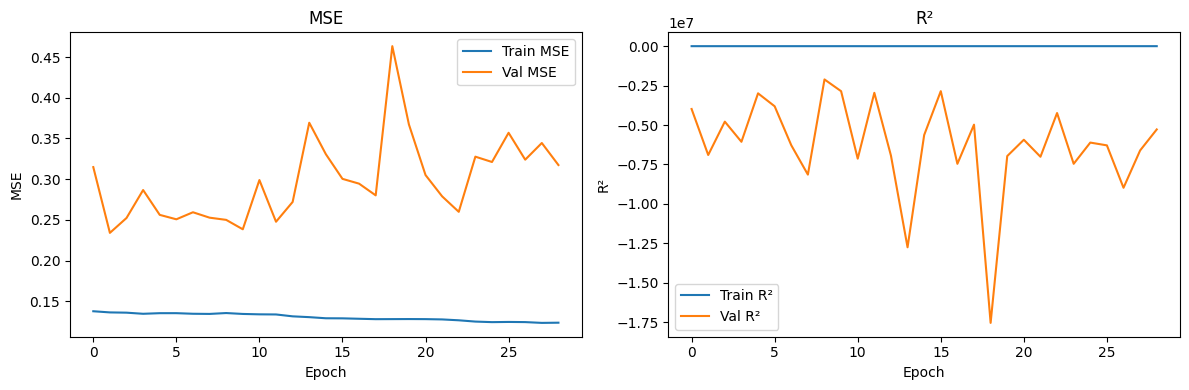

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


n_features = len(features)

def build_stacked_lstm(window_size, n_features, horizon,
                       units1, units2, dropout1, dropout2, lr):
    model = Sequential()
    # LSTM layer 1
    model.add(LSTM(units1,
                   return_sequences=True,
                   input_shape=(window_size, n_features)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout1))
    # LSTM layer 2
    model.add(LSTM(units2, return_sequences=False))
    model.add(BatchNormalization())
    model.add(Dropout(dropout2))
    # Dense output
    model.add(Dense(horizon, activation='linear'))
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='mse',
        metrics=['mae']
    )
    return model


def build_model_hp(hp):
    return build_stacked_lstm(
        window_size=window_size,
        n_features=n_features,
        horizon=horizon,
        units1=hp.Choice('units1', [64, 128, 256]),
        units2=hp.Choice('units2', [32, 64, 128]),
        dropout1=hp.Float('dropout1', 0.1, 0.5, step=0.1),
        dropout2=hp.Float('dropout2', 0.1, 0.5, step=0.1),
        lr=hp.Choice('lr', [1e-2, 1e-3, 1e-4])
    )


tuner = RandomSearch(
    build_model_hp,
    objective='val_loss',    
    max_trials=20,             
    executions_per_trial=1,
    directory='rs_lstm',
    project_name='lstm_rs'
)


tuner.search(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ],
    verbose=1
)

best_hp    = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

print("Best hyperparameters found:")
print(f"  units1   = {best_hp.get('units1')}")
print(f"  units2   = {best_hp.get('units2')}")
print(f"  dropout1 = {best_hp.get('dropout1'):.2f}")
print(f"  dropout2 = {best_hp.get('dropout2'):.2f}")
print(f"  lr       = {best_hp.get('lr')}")

history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    ],
    verbose=1
)

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'],  label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Best Model Training')
plt.legend()
plt.show()


In [14]:
best_model.save('best_model_2.h5')
print("Saved best_model to best_model.h5")

Saved best_model to best_model.h5


In [15]:
# from tensorflow.keras.models import load_model
# loaded_model = load_model('best_model.h5', compile=True)

In [16]:
from scipy.stats import pearsonr

y_pred = best_model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Test MSE  : {mse:.4f}")
print(f"Test RMSE : {rmse:.4f}")
print(f"Test MAE  : {mae:.4f}")
print(f"Test R^2  : {r2:.4f}")

y_true_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()
pearson_r, p_value = pearsonr(y_true_flat, y_pred_flat)
print(f"Overall Pearson R: {pearson_r:.4f}")

2183/2183 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Test MSE  : 0.3264
Test RMSE : 0.5713
Test MAE  : 0.2031
Test R^2  : 0.2115
Overall Pearson R: 0.5023


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

C:\Users\giakh\AppData\Local\Temp\ipykernel_5524\2281192701.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


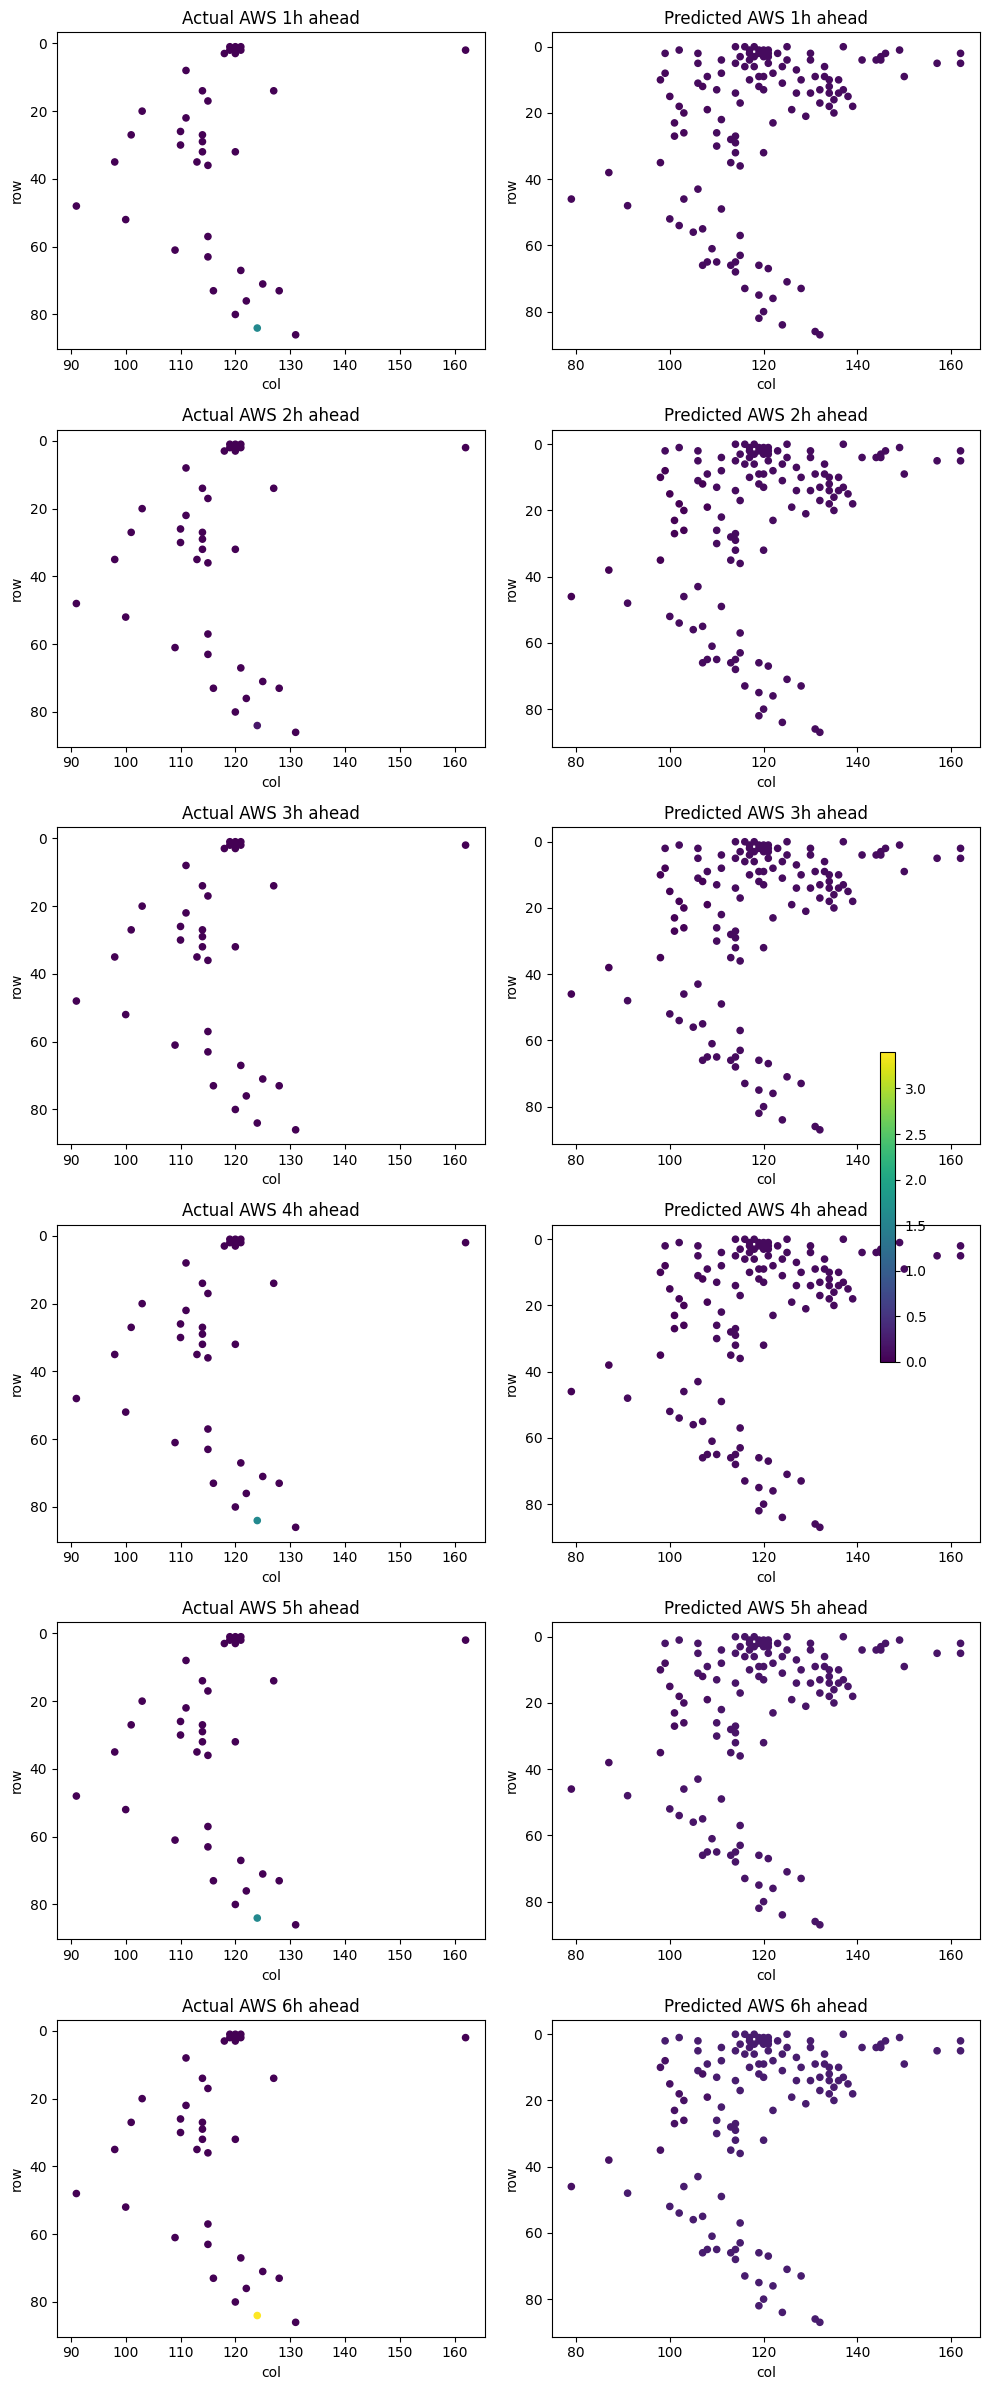

In [17]:
from datetime import timedelta


test_day   = pd.to_datetime('2020-04-15 00:00')
prev_times = [test_day - timedelta(hours=i) for i in range(window_size, 0, -1)]


coord_cols = ['row', 'col']
df2020     = df[df['datetime'].dt.year == 2020].copy()
grid       = df2020[coord_cols].drop_duplicates().reset_index(drop=True)
nP         = len(grid)
pred_map = np.full((horizon, nP), np.nan)
act_map  = np.full((horizon, nP), np.nan)

for idx, pt in grid.iterrows():
    cond   = (df2020['row']==pt['row']) & (df2020['col']==pt['col'])
    df_loc = df2020[cond].sort_values('datetime').reset_index(drop=True)
    df_win = df_loc[df_loc['datetime'].isin(prev_times)]
    if len(df_win) != window_size:
        continue
    
    Xd    = df_win[features].values.reshape(1, window_size, len(features))
    y_l   = best_model.predict(Xd).flatten()      
    pred_map[:, idx] = y_l
    
    df_act = df_loc[
        (df_loc['datetime'] >= test_day) &
        (df_loc['datetime'] <  test_day + timedelta(hours=horizon))
    ].sort_values('datetime')
    if len(df_act) != horizon:
        continue
    act_map[:, idx] = df_act[target].values

print(f"Built maps for {nP} points.")

vmin = np.nanmin(act_map)
vmax = np.nanmax(act_map)

fig, axes = plt.subplots(nrows=horizon, ncols=2, figsize=(10, 4*horizon))
for h in range(horizon):
    ax1, ax2 = axes[h]
    sc1 = ax1.scatter(
        grid['col'], grid['row'], c=act_map[h],
        s=20, vmin=vmin, vmax=vmax
    )
    ax1.set_title(f'Actual AWS {h+1}h ahead')
    ax1.invert_yaxis()
    ax1.set_xlabel('col'); ax1.set_ylabel('row')

    sc2 = ax2.scatter(
        grid['col'], grid['row'], c=pred_map[h],
        s=20, vmin=vmin, vmax=vmax
    )
    ax2.set_title(f'Predicted AWS {h+1}h ahead')
    ax2.invert_yaxis()
    ax2.set_xlabel('col'); ax2.set_ylabel('row')

fig.colorbar(sc1, ax=axes, orientation='vertical', fraction=0.02)
plt.tight_layout()
plt.show()
